In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('./net_per_cap.txt', header=0)
rng = pd.date_range("1961-12-31", periods=len(df), freq='A')
rng
# print(df.head(5))

DatetimeIndex(['1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31',
               '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31',
               '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31',
               '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31',
               '1977-12-31', '1978-12-31', '1979-12-31', '1980-12-31',
               '1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31',
               '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31',
               '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31',
               '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31',
               '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31',
               '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31'],
              dtype='datetime64[n

In [5]:
# dane w postaci tabeli
data = df.iloc[:,1:]

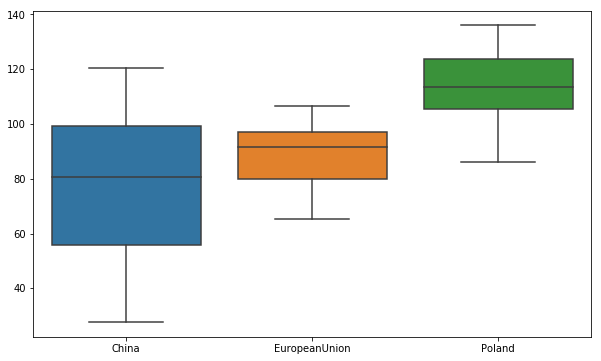

In [6]:
plt.figure(figsize=(10,6));
sns.boxplot(data=df[["China", "EuropeanUnion", "Poland"]])
plt.show()

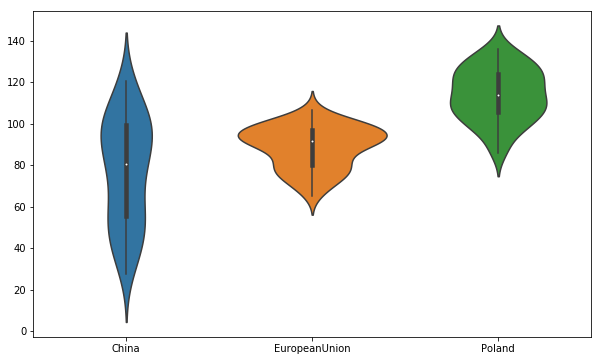

In [7]:
plt.figure(figsize=(10,6));
sns.violinplot(data=df[["China", "EuropeanUnion", "Poland"]])
plt.show()

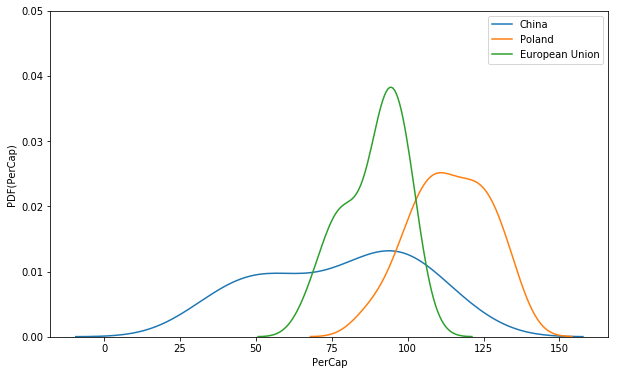

In [8]:
plt.figure(figsize=(10,6));
sns.kdeplot(df.China, label="China")
sns.kdeplot(df.Poland, label="Poland")
sns.kdeplot(df.EuropeanUnion, label="European Union")
plt.legend(loc='best')
plt.ylim(0,0.05)
plt.xlabel('PerCap')
plt.ylabel('PDF(PerCap)')
plt.show()

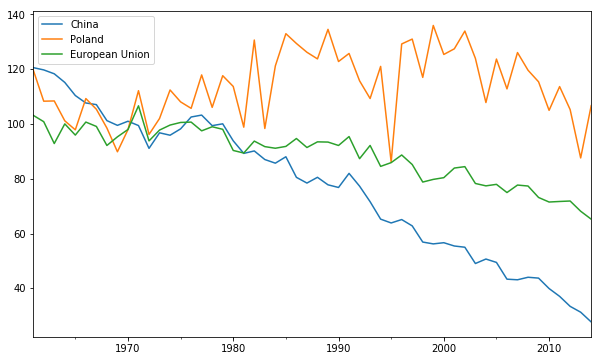

In [9]:
series_CH = Series(df.China)
series_UE = Series(df.Poland)
series_PL = Series(df.EuropeanUnion)
series_CH.index = rng
series_UE.index = rng
series_PL.index = rng


plt.figure(figsize=(10,6));
series_CH.plot(label="China")
series_UE.plot(label="Poland")
series_PL.plot(label="European Union")
plt.legend(loc='best')
plt.show()

In [10]:
series_UE
series_pl

NameError: name 'series_pl' is not defined

# Anowa

In [11]:
data_for_anowa = np.vstack((np.hstack((df.China , df.Poland, df.EuropeanUnion)) , np.hstack(([1]*len(df.China), [2]*len(df.China), [3]*len(df.China))))).T
df_for_anowa = pd.DataFrame(data_for_anowa)
df_for_anowa.columns =["Value","Country"] 
df_for_anowa.head()


,Value,Country
0,120.60,1.0
1,119.76,1.0
2,118.34,1.0
3,115.19,1.0
4,110.41,1.0


Sprawdzamy założenie o równości wariancji 

In [12]:
# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(df.China, df.Poland, df.EuropeanUnion)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))

Nie mo zna wykonać ANOVA bo nie spełnione jesgt założenie o równości varjanci w zbiorach.
Wykonuje więc tesy 
```python
kruskalwallis()
```

In [13]:
np.array(df.China.iloc[:])

array([120.6 , 119.76, 118.34, 115.19, 110.41, 107.69, 107.09, 101.25,
        99.52, 101.03,  99.45,  91.12,  96.8 ,  95.92,  98.24, 102.57,
       103.27,  99.42, 100.08,  93.88,  89.29,  90.18,  87.05,  85.72,
        88.06,  80.55,  78.46,  80.56,  77.82,  76.85,  82.  ,  77.33,
        71.66,  65.29,  63.9 ,  65.14,  62.83,  56.93,  56.26,  56.69,
        55.49,  55.04,  49.1 ,  50.73,  49.5 ,  43.38,  43.16,  44.08,
        43.77,  39.96,  37.11,  33.46,  31.33,  27.76])

In [14]:
from scipy.stats.mstats import kruskalwallis
h, p = kruskalwallis(np.array(df.China.iloc[:]), np.array(df.Poland.iloc[:]), np.array(df.EuropeanUnion.iloc[:]))
print(p)
# Print the results
if p<0.05:
    print('There is a significant difference.')
else:
    print('No significant difference between.')

2.044169320345994e-17
There is a significant difference.


Odrzucam hipotezę o równości średnich w grupach

$$
H_0: m_1 = m_2 = \ldots = m_n
$$

na rzecz hipotezy alternatywnej

$$
H_1: \exists_{i,j \ i \neq j} \colon  \mbox{  } m_j \neq m_j
$$



# Przewidywanie szeregu czasowego

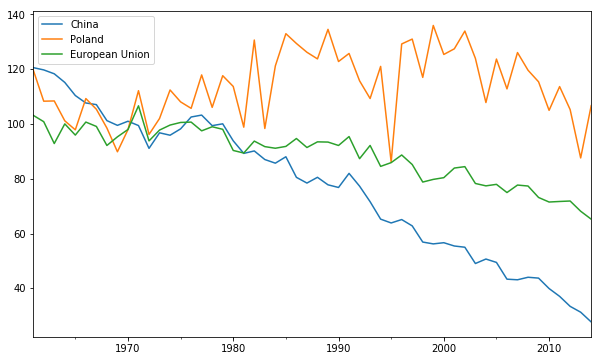

In [15]:
series_CH = Series(df.China)
series_UE = Series(df.Poland)
series_PL = Series(df.EuropeanUnion)
series_CH.index = rng
series_UE.index = rng
series_PL.index = rng


plt.figure(figsize=(10,6));
series_CH.plot(label="China")
series_UE.plot(label="Poland")
series_PL.plot(label="European Union")
plt.legend(loc='best')
plt.show()

Każdy z osoban

In [16]:
rng1 = pd.date_range('2061-12-31', "2010-12-31", freq='A')
rng2 = pd.date_range('2010-12-31', "2014-12-31", freq='A')
rng2
# rng2 =pd.date_range('1902-12-01', periods=12, freq='M').shift(1, freq=pd.datetools.day)

DatetimeIndex(['2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [17]:
test_len = 10

In [18]:
series_CH_test = pd.Series(series_CH.iloc[-test_len:])
series_CH_train = pd.Series(series_CH.iloc[:(-test_len+1)])

series_PL_test = pd.Series(series_PL.iloc[-test_len:])
series_PL_train = pd.Series(series_PL.iloc[:(-test_len+1)])

series_UE_test = pd.Series(series_UE.iloc[-test_len:])
series_UE_train = pd.Series(series_UE.iloc[:(-test_len+1)])

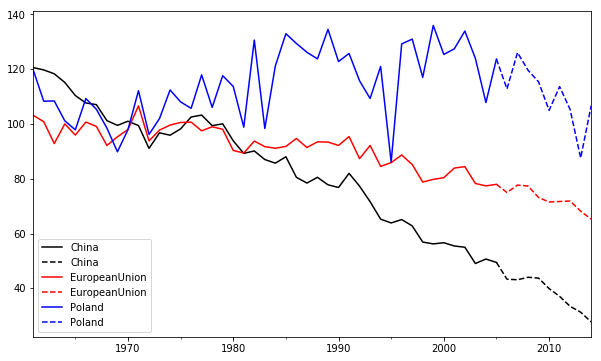

In [19]:
plt.figure(figsize=(10,6));
series_CH_train.plot(style='k', legend=" Train China ")
series_CH_test.plot(style='k--', legend=" Test China ")

series_PL_train.plot(style='r', legend=" Train China ")
series_PL_test.plot(style='r--', legend=" Test China ")

series_UE_train.plot(style='b', legend=" Train China ")
series_UE_test.plot(style='b--', legend=" Test China ")
plt.show()

  * I tu się pojawi aproblem jak dobać parametry ARIMA.
  * Najćzesciej rysuje się wykres korelacji i korelacji cześciowej


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


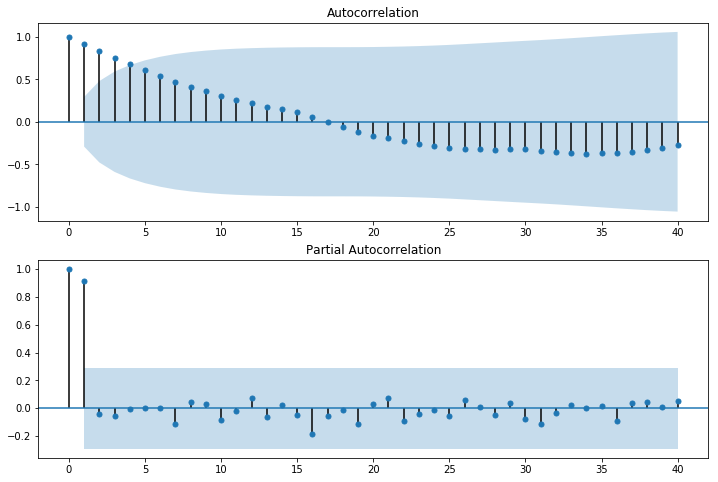

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series_CH_train.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(series_CH_train.values, lags=40, ax=ax2)
plt.show()

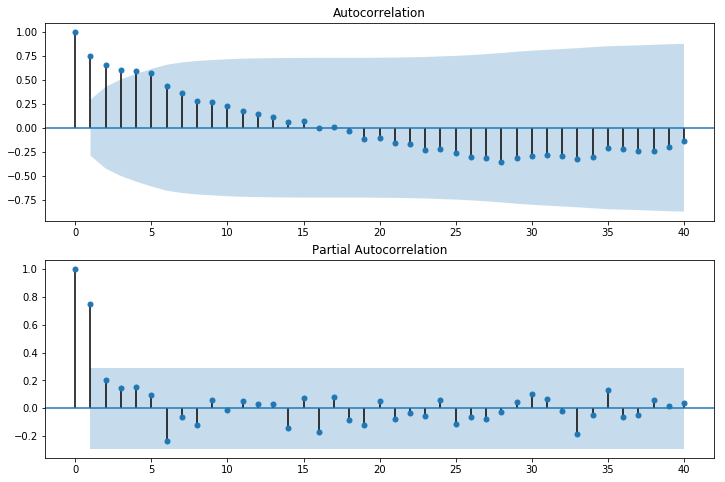

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series_PL_train.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(series_PL_train.values, lags=40, ax=ax2)
plt.show()

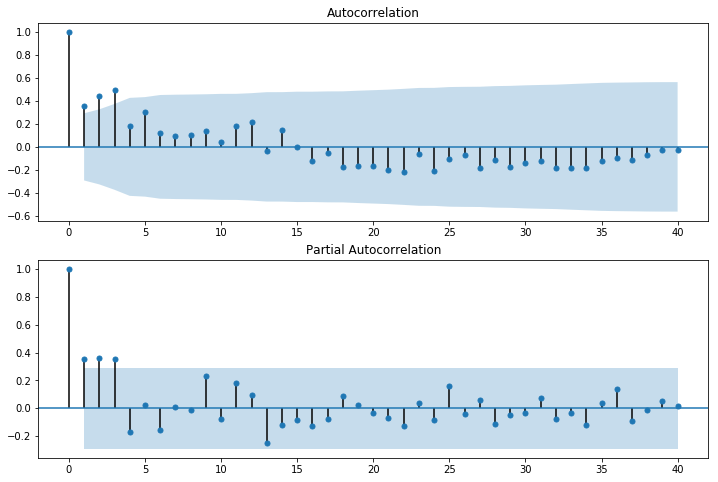

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series_UE_train.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(series_UE_train.values, lags=40, ax=ax2)
plt.show()

# Na muj gust zadziała wszędzie ARMA(2,2)

In [23]:
import statsmodels.api as sm

In [24]:
arma_mod20_CH = sm.tsa.ARMA(series_CH_train, (4,0)).fit()


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [25]:
arma_mod20_PL = sm.tsa.ARMA(series_PL_train, (4,1)).fit()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [26]:
arma_mod20_UE = sm.tsa.ARMA(series_UE_train, (3,2)).fit()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [27]:
# print(arma_mod20_CH.summary())
# series_CH_test.index

In [28]:
predict_arma_mod20_CH = arma_mod20_CH.predict('2005-12-31', '2014-12-31', dynamic=True)
predict_arma_mod20_PL = arma_mod20_PL.predict('2005-12-31', '2014-12-31', dynamic=True)
predict_arma_mod20_UE = arma_mod20_UE.predict('2005-12-31', '2014-12-31', dynamic=True)

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


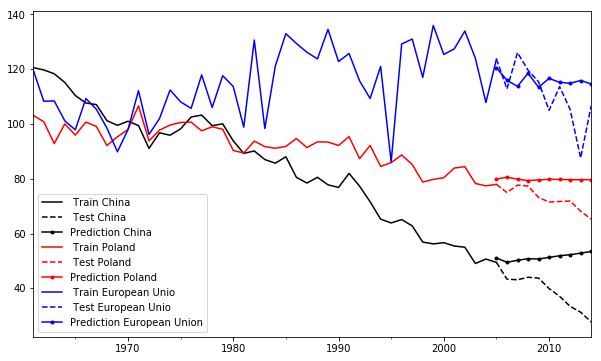

In [68]:
plt.figure(figsize=(10,6));
series_CH_train.plot(style='k', label=" Train China ")
series_CH_test.plot(style='k--', label=" Test China ")
predict_arma_mod20_CH.plot(style='k.-', label='Prediction China ');

series_PL_train.plot(style='r', label=" Train Poland ")
series_PL_test.plot(style='r--', label=" Test Poland ")
predict_arma_mod20_PL.plot(style='r.-', label='Prediction Poland');

series_UE_train.plot(style='b', label=" Train European Unio ")
series_UE_test.plot(style='b--', label=" Test European Unio ")
predict_arma_mod20_UE.plot(style='b.-', label='Prediction European Union');
plt.legend(loc='best')
plt.show()

# Wnisek 

  * Dane mają troszkę za małą charakterystykę by nauczyć się przwidywać 10 lat do przodu.
  * Sprawdźmy czy da się przewidzieć rok do przodu. 
    * w tym celu będziemy uczyć model na train 
    * przewidzimy jeden punkt czasowy do przodu i zaznaczymy go jako przewidziany
    * następnie dodamy prawdziwy ounkt do danych trainingowych i znowu przewidzimy punkt do przodu


In [58]:
history_CH = [x for x in series_CH_train]
predictions_CH = list()
for t in range(len(series_CH_test)):
    model_CH = sm.tsa.ARMA(history_CH, order=(4,0))
    model_fit_CH = model_CH.fit(disp=0)
    output = model_fit_CH.predict(start=len(history_CH), end=(len(history_CH)+1))
    yhat = output[0]
    predictions_CH.append(yhat)
    obs = series_CH_test[t]
    history_CH.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
pre_CH=pd.Series(predictions_CH, index=series_CH_test.index)    

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=47.758987, expected=49.500000
predicted=50.410175, expected=43.380000
predicted=42.728350, expected=43.160000


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=43.335881, expected=44.080000
predicted=42.697470, expected=43.770000
predicted=44.020139, expected=39.960000
predicted=40.124727, expected=37.110000


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=36.948229, expected=33.460000
predicted=32.156994, expected=31.330000
predicted=30.067209, expected=27.760000


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [64]:
history_PL = [x for x in series_PL_train]
predictions_PL = list()
for t in range(len(series_PL_test)):
    model_PL = sm.tsa.ARMA(history_PL, order=(2,0))
    model_fit_PL = model_PL.fit(disp=0)
    output = model_fit_PL.predict(start=len(history_PL), end=(len(history_PL)+1))
    yhat = output[0]
    predictions_PL.append(yhat)
    obs = series_PL_test[t]
    history_PL.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
pre_PL=pd.Series(predictions_PL, index=series_PL_test.index)    

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=78.926736, expected=77.990000
predicted=79.034210, expected=75.000000
predicted=77.043028, expected=77.730000
predicted=77.619449, expected=77.380000
predicted=78.355111, expected=73.200000
predicted=75.551719, expected=71.540000
predicted=72.860911, expected=71.740000
predicted=72.345936, expected=71.910000
predicted=72.493062, expected=68.180000
predicted=70.115204, expected=65.280000


In [71]:
history_UE = [x for x in series_UE_train]
predictions_UE = list()
for t in range(len(series_PL_test)):
    model_UE = sm.tsa.ARMA(history_UE, order=(3,2))
    model_fit_UE = model_UE.fit(disp=0)
    output = model_fit_UE.predict(start=len(history_UE), end=(len(history_UE)+1))
    yhat = output[0]
    predictions_UE.append(yhat)
    obs = series_UE_test[t]
    history_UE.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
pre_UE=pd.Series(predictions_UE, index=series_UE_test.index)  

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=116.643877, expected=123.720000
predicted=116.079335, expected=112.830000
predicted=121.244966, expected=126.090000
predicted=117.340508, expected=119.640000
predicted=118.244037, expected=115.420000
predicted=120.583065, expected=105.000000
predicted=112.430605, expected=113.670000
predicted=113.862710, expected=105.280000
predicted=108.047166, expected=87.630000
predicted=108.323957, expected=106.720000


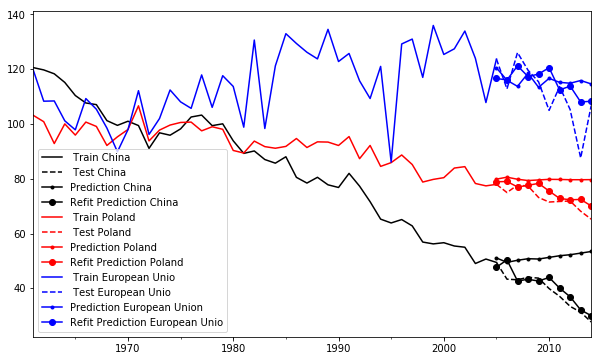

In [72]:
plt.figure(figsize=(10,6));
series_CH_train.plot(style='k', label=" Train China ")
series_CH_test.plot(style='k--', label=" Test China ")
predict_arma_mod20_CH.plot(style='k.-', label='Prediction China');
pre_CH.plot(style='ko-', label='Refit Prediction China');

series_PL_train.plot(style='r', label=" Train Poland ")
series_PL_test.plot(style='r--', label=" Test Poland ")
predict_arma_mod20_PL.plot(style='r.-', label='Prediction Poland');
pre_PL.plot(style='ro-', label='Refit Prediction Poland');

series_UE_train.plot(style='b', label=" Train European Unio ")
series_UE_test.plot(style='b--', label=" Test European Unio ")
predict_arma_mod20_UE.plot(style='b.-', label='Prediction European Union');
pre_UE.plot(style='bo-', label='Refit Prediction European Unio');

plt.legend(loc='best')
plt.show()

# Można spróbować bardiej zaawansowanych metod ale nie wiem czy chcemy.